# 第六章 使用scikit-learn构建模型

## 1.使用sklearn处理wine、winequality数据集

### （1）读取数据集

In [29]:
import pandas as pd
import numpy as np

'''
# Another complex way to read the csv
wq_raw = pd.read_csv('winequality.csv')
wq_col = np.array([i.replace('\"',"") for i in wq_raw.columns.tolist()[0].split(';')])
wq = np.array([eval(j) for j in wq_raw.values[0][0].split(';')])
for i in wq_raw.index.tolist()[1:]:
    wq = np.vstack((wq,np.array([eval(j) for j in wq_raw.values[i][0].split(';')])))
wq = pd.DataFrame(wq,columns = wq_col.tolist())
'''

w = pd.read_csv('wine.csv')
wq = pd.read_csv('winequality.csv',sep=';')

wq

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


### （2）拆分两个数据集的数据和标签

In [97]:
w_target = w['Class']
w_data = w.iloc[:,1:]

wq_target = wq['quality']
wq_data = wq.iloc[:,:-1]

wq_data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5


### （3）将wine_quality数据集划分为训练集、测试集

In [87]:
from sklearn.model_selection import train_test_split

w_target_train,w_target_test,w_data_train,w_data_test = train_test_split(w_target,w_data,test_size = 0.2)
wq_target_train,wq_target_test,wq_data_train,wq_data_test = train_test_split(wq_target,wq_data,test_size = 0.2)

wq_target_train.shape

(1279,)

### （4）标准化两个数据集

In [32]:
from sklearn.preprocessing import MinMaxScaler
'''
#生成规则 
Scaler_rule_w =  MinMaxScaler().fit(w) 
Scaler_rule_wq = MinMaxScaler().fit(wq) 

w_Scaler = Scaler_rule_w.transform(w)
wq_Scaler = Scaler_rule_wq.transform(wq) 
'''

#标准化后数据集
w_Scale = MinMaxScaler().fit_transform(w)
wq_Scale = MinMaxScaler().fit_transform(wq)


### （5）对两个数据集进行PCA降维

In [33]:
from sklearn.decomposition import PCA
w_pca_model = PCA(n_components=2).fit(w_Scale) #保留95%数据的模型
wq_pca_model = PCA(n_components=0.95).fit(wq_Scale)

w_Scale_PCA = w_pca_model.transform(w_Scale)
wq_Scale_PCA = wq_pca_model.transform(wq_Scale)

In [34]:
print(w_PCA.shape)
w.shape

NameError: name 'w_PCA' is not defined

## 2.构建基于wine数据集的K-Means 聚类模型

### （1）根据上一题处理结果，构建聚类数目为3的K-Means模型

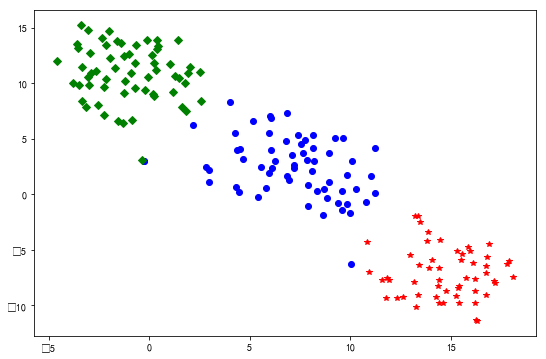

Score: 0.9125568347667763


In [69]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import fowlkes_mallows_score




w_Scale = MinMaxScaler().fit_transform(w_data)

#w_Scale = MinMaxScaler().fit_transform(w)

# train model,真正影响聚类结果
kmeans = KMeans(n_clusters = 3).fit(w_Scale)


# TSNE进行降维，不影响结果
tsne = TSNE(n_components = 2,init = 'random').fit(w_Scale)

'''

#如果用PCA呢？
df = pd.DataFrame(w_Scale_PCA)
df['labels'] = kmeans.labels_
'''


#将TSNE的嵌入空间传入DataFrame,作为聚类结果的投影平面
df = pd.DataFrame(tsne.embedding_)
df['labels'] = kmeans.labels_

# 提取标签与对应的坐标
df1 = df[df['labels']==0]
df2 = df[df['labels']==1]
df3 = df[df['labels']==2]

fig = plt.figure(figsize=(9,6))
plt.plot(df1[0],df1[1],'bo',df2[0],df2[1],'r*',df3[0],df3[1],'gD')
plt.savefig('cluster_test')
plt.show()

score = fowlkes_mallows_score(w_target,kmeans.labels_)
print("Score:",score)

#No Scale：0.5835370218944976
#可见标准化极大提升聚类效果
#PCA：0.976831868106378
#PCA降维与不影响

### （2）对比真实标签和聚类标签求取FMI

In [70]:
from sklearn.metrics import fowlkes_mallows_score
score = fowlkes_mallows_score(w_target,kmeans.labels_)
print(score)

0.9125568347667763


### （3）在聚类数目为2-10类时，确定最优聚类数目

2 0.6428941723110391
3 0.9125568347667763
4 0.8339886920675469
5 0.7459063864965596
6 0.7501782529558072
7 0.6781527059578005
8 0.5964948410409785
9 0.5599351847333229
10 0.5274715439005335


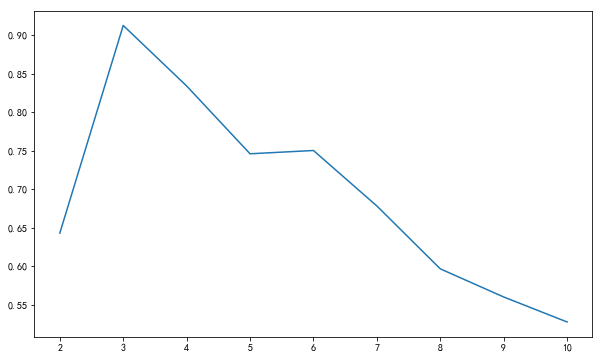

In [71]:
scores = []
for i in range(2,11):
    #构建并训练模型
    kmeans = KMeans(n_clusters = i).fit(w_Scale)
    score = fowlkes_mallows_score(w_target,kmeans.labels_)
    scores.append(score)
    print(i,score)
plt.figure(figsize=(10,6))
plt.plot(range(2,11),scores,linewidth=1.5,linestyle="-")
plt.show()

### （4）求取模型的轮廓系数，绘制轮廓系数折线图，确定最优聚类数目

2 0.29872218159747743
3 0.3008938518500134
4 0.25993667561623146
5 0.21186481815618793
6 0.1986045406939783
7 0.1488086706962017
8 0.13949692783040415
9 0.13846995018742714
10 0.13408229763695348


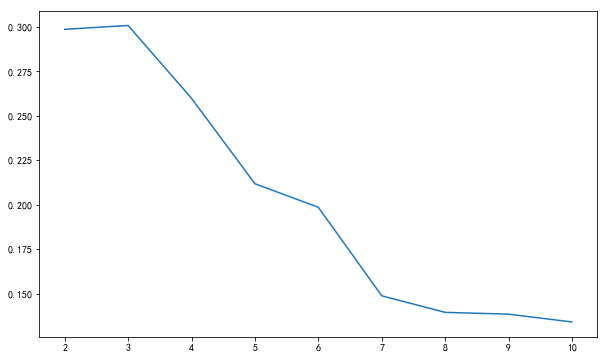

In [72]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
silhouettteScore = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i).fit(w_Scale)
    score = silhouette_score(w_Scale,kmeans.labels_)
    silhouettteScore.append(score)
    print(i,score)
plt.figure(figsize=(10,6))
plt.plot(range(2,11),silhouettteScore,linewidth=1.5,linestyle="-")
plt.show()

### （5）求取Calinski-Harabasz指数，确定最优聚类数目

2 84.70850444407333
3 83.3170271984246
4 65.85204613361334
5 54.39111543329835
6 48.209491396709176
7 43.54941148535257
8 39.195947310826355
9 37.57880773451821
10 35.43571604755046


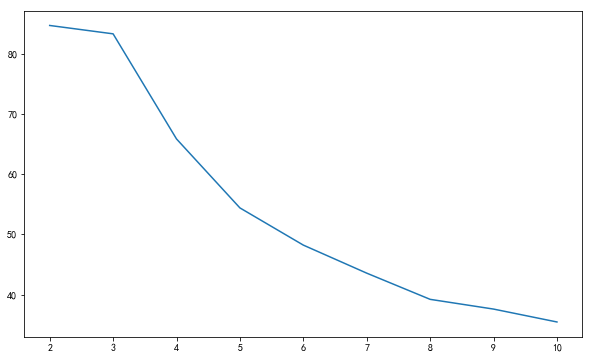

In [73]:
from sklearn.metrics import calinski_harabaz_score
calinski_harabaz_score_list = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i).fit(w_Scale)
    score = calinski_harabaz_score(w_Scale,kmeans.labels_)
    calinski_harabaz_score_list.append(score)
    print(i,score)
plt.figure(figsize=(10,6))
plt.plot(range(2,11),calinski_harabaz_score_list,linewidth=1.5,linestyle="-")
plt.show()

## 3.构建基于wine数据集的SVM分类模型

### （1）读取wine数据集，区分标签和数据

In [46]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

w = pd.read_csv('wine.csv')

w_target = w['Class']
w_data = w.iloc[:,1:]

### （2）将wine数据集划分为训练集和测试集

In [47]:
from sklearn.model_selection import train_test_split

w_target_train,w_target_test,w_data_train,w_data_test = train_test_split(w_target,w_data,test_size = 0.25)

### （3）使用离差标准化方法标准化wine数据集

In [48]:
w_Scaler = MinMaxScaler().fit(w_data_train)
w_trainMinMax = w_Scaler.transform(w_data_train)
w_testMinMax = w_Scaler.transform(w_data_test)

### （4）构建SVM模型，预测测试集结果

In [49]:
svm = SVC().fit(w_trainMinMax,w_target_train)
svm_ovr =  SVC(decision_function_shape="ovr").fit(w_trainMinMax,w_target_train)
prediction =svm.predict(w_testMinMax)
prediction_ovr =svm_ovr.predict(w_testMinMax)
print(prediction)

true = np.sum(prediction == w_target_test)
print("true:",true)
print("wrong:",w_testMinMax.shape[0]-true)
print("true percentage:",true/w_testMinMax.shape[0])

true_ovr = np.sum(prediction_ovr == w_target_test)
print("true_ovr:",true_ovr)
print("wrong_ovr:",w_testMinMax.shape[0]-true_ovr)
print("true percentage_ovr:",true_ovr/w_testMinMax.shape[0])

[3 1 1 2 2 2 1 1 2 1 2 2 2 3 3 2 2 3 1 3 3 3 1 1 2 3 3 3 2 1 2 1 2 3 3 3 3
 1 1 3 1 2 2 3 2]
true: 44
wrong: 1
true percentage: 0.9777777777777777
true_ovr: 44
wrong_ovr: 1
true percentage_ovr: 0.9777777777777777


### （5）打印分类报告，评价分类模型性能

In [50]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
from sklearn.metrics import classification_report


print("Accuracy:",accuracy_score(w_target_test,prediction))
print("Precision:",precision_score(w_target_test,prediction,average=None))
print("Recall:",recall_score(w_target_test,prediction,average=None))
print("F1:",f1_score(w_target_test,prediction,average=None))
print("Cohen kappa:",cohen_kappa_score(w_target_test,prediction))


print("Report:",classification_report(w_target_test,prediction))


#ROC 曲线主要针对二分类模型，在此分三类能否套用？

Accuracy: 0.9777777777777777
Precision: [0.92307692 1.         1.        ]
Recall: [1.         0.94117647 1.        ]
F1: [0.96       0.96969697 1.        ]
Cohen kappa: 0.9664429530201343
Report:              precision    recall  f1-score   support

          1       0.92      1.00      0.96        12
          2       1.00      0.94      0.97        17
          3       1.00      1.00      1.00        16

avg / total       0.98      0.98      0.98        45



In [51]:
print("Accuracy_ovr:",accuracy_score(w_target_test,prediction_ovr))
print("Precision_ovr:",precision_score(w_target_test,prediction_ovr,average=None))
print("Recall_ovr:",recall_score(w_target_test,prediction_ovr,average=None))
print("F1_ovr:",f1_score(w_target_test,prediction_ovr,average=None))
print("Cohen kappa_ovr:",cohen_kappa_score(w_target_test,prediction_ovr))


print("Report_ovr:",classification_report(w_target_test,prediction_ovr))

Accuracy_ovr: 0.9777777777777777
Precision_ovr: [0.92307692 1.         1.        ]
Recall_ovr: [1.         0.94117647 1.        ]
F1_ovr: [0.96       0.96969697 1.        ]
Cohen kappa_ovr: 0.9664429530201343
Report_ovr:              precision    recall  f1-score   support

          1       0.92      1.00      0.96        12
          2       1.00      0.94      0.97        17
          3       1.00      1.00      1.00        16

avg / total       0.98      0.98      0.98        45



## 4.构建基于wine_quality数据集的回归模型

In [38]:
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams
import matplotlib.pyplot as plt

### （1）根据wine_quality数据集数据集处理结果，构建线性回归模型

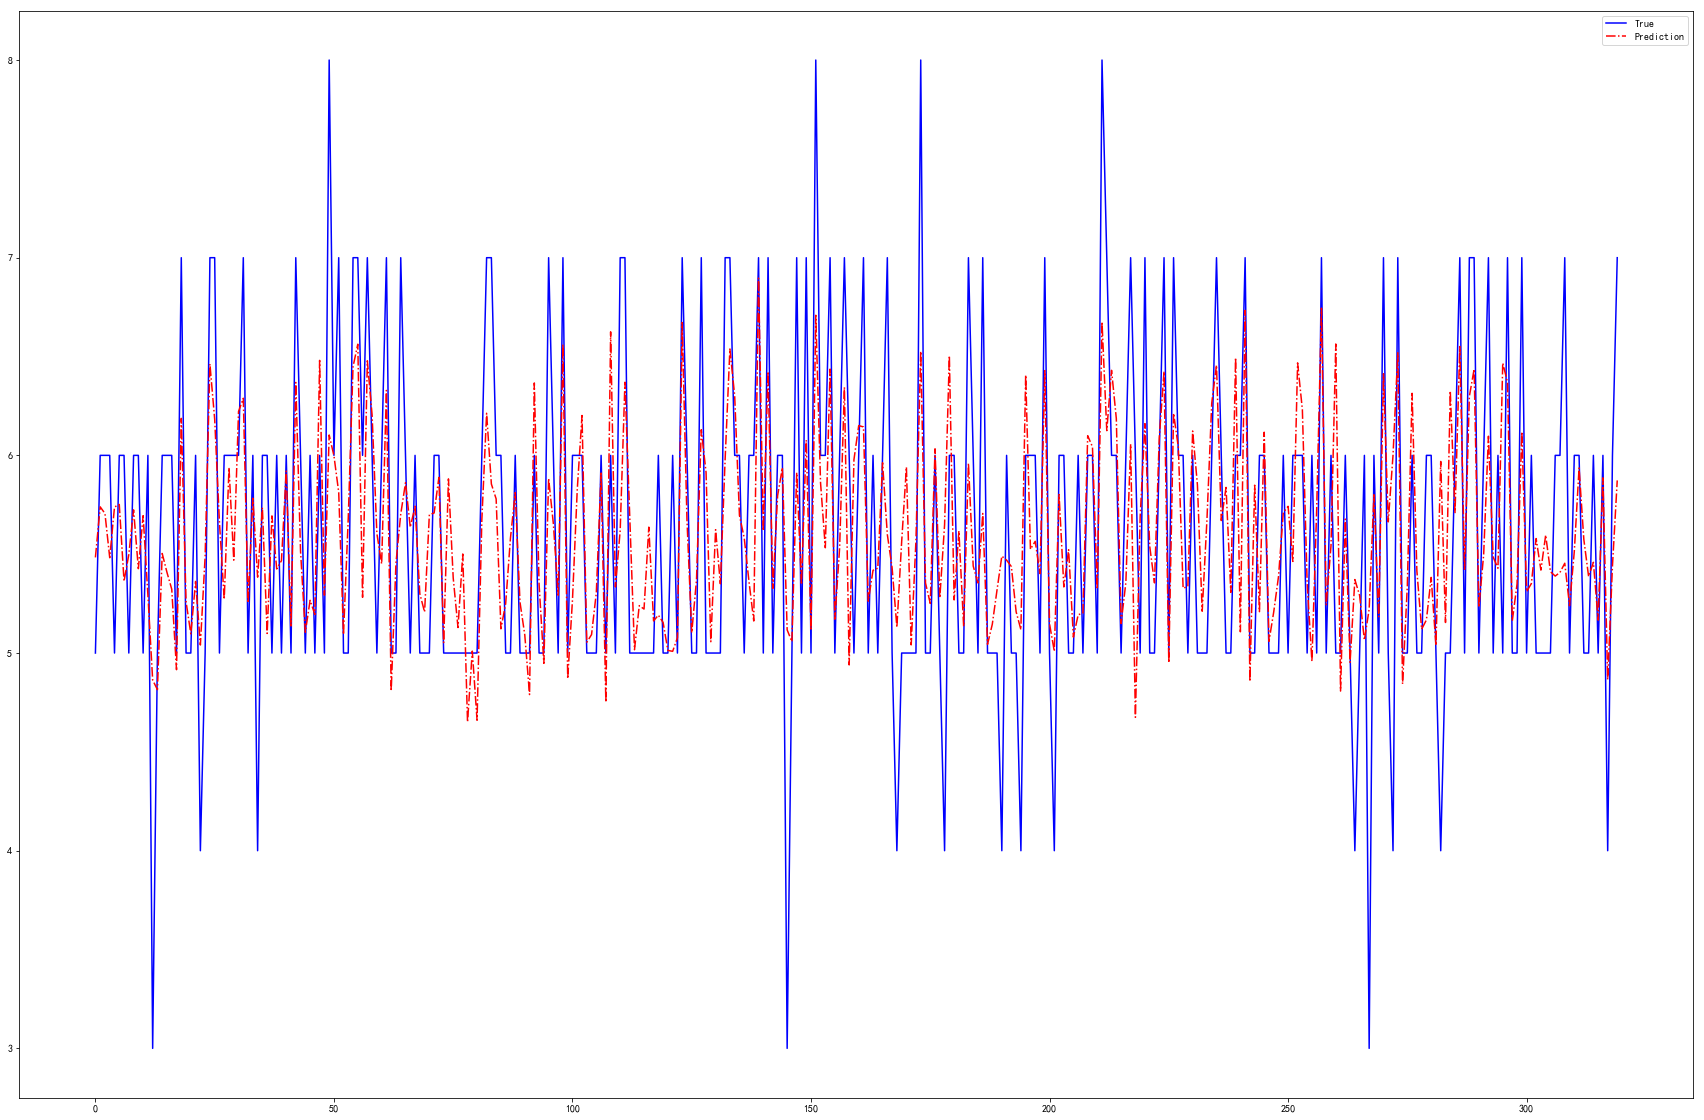

In [88]:
clf = LinearRegression().fit(wq_data_train,wq_target_train)
wq_target_pred = clf.predict(wq_data_test)

rcParams['font.sans-serif']='SimHei'
fig=plt.figure(figsize=(30,20))
plt.plot(range(wq_target_test.shape[0]),wq_target_test,color="blue",linewidth=1.5,linestyle="-")
plt.plot(range(wq_target_test.shape[0]),wq_target_pred,color="red",linewidth=1.5,linestyle="-.")
plt.legend(["True","Prediction"])

plt.savefig("predict_linear")
plt.show()



### （2）根据wine_quality数据集数据集处理结果，构建梯度提升回归模型



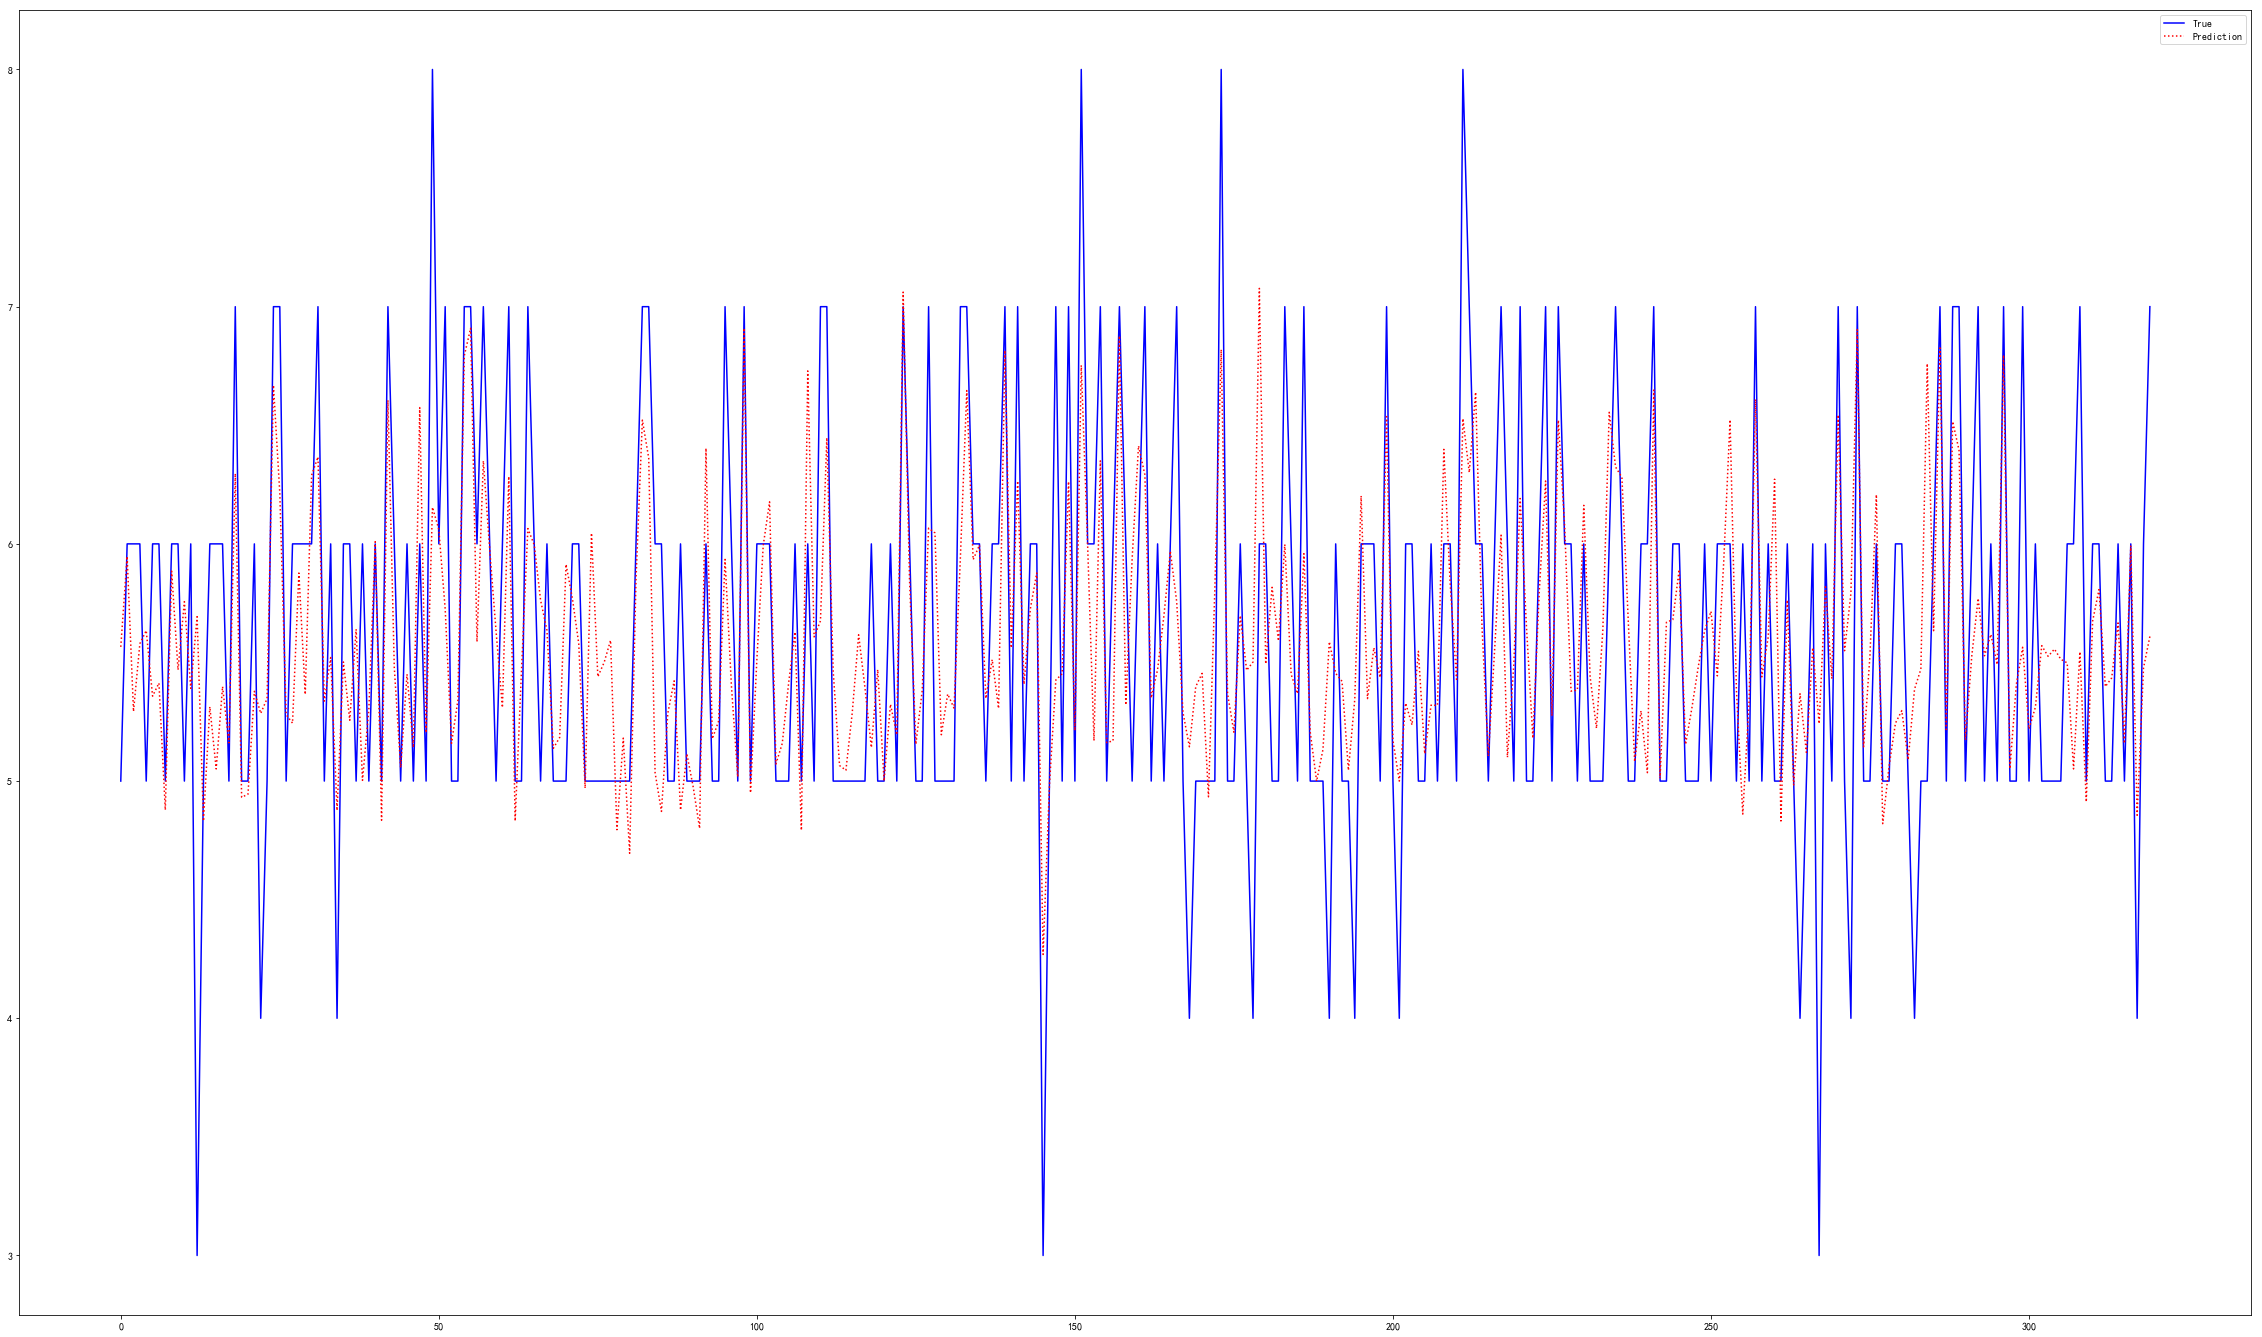

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

wq_GradientBoost = GradientBoostingRegressor().fit(wq_data_train,wq_target_train)
wq_Gradient_pred = wq_GradientBoost.predict(wq_data_test)

rcParams['font.sans-serif']='SimHei'
fig=plt.figure(figsize=(40,24))
plt.plot(range(wq_target_test.shape[0]),wq_target_test,color="blue",linewidth=1.5,linestyle="-")
plt.plot(range(wq_target_test.shape[0]),wq_Gradient_pred,color="red",linewidth=1.5,linestyle=":")
plt.legend(["True","Prediction"])

plt.show()

### （3）结合真实评分和预测评分，计算均方误差，中值绝对误差，可解释方差值

In [94]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
import numpy as np

naive_absolute = mean_absolute_error(wq_target_test,wq_target_pred)
naive_squared = mean_squared_error(wq_target_test,wq_target_pred)
naive_median = median_absolute_error(wq_target_test,wq_target_pred)
naive_explain = explained_variance_score(wq_target_test,wq_target_pred)
naive_r2 = r2_score(wq_target_test,wq_target_pred)


gradient_absolute = mean_absolute_error(wq_target_test,wq_Gradient_pred)
gradient_squared = mean_squared_error(wq_target_test,wq_Gradient_pred)
gradient_median = median_absolute_error(wq_target_test,wq_Gradient_pred)
gradient_explain = explained_variance_score(wq_target_test,wq_Gradient_pred)
gradient_r2 = r2_score(wq_target_test,wq_Gradient_pred)

print("mean absolute error:",gradient_absolute)
print("mean squared error:",gradient_squared)
print("median absolute error:",gradient_median)
print("explained variance:",gradient_explain)
print("r2 score:",gradient_r2)

mean absolute error: 0.5075375042759627
mean squared error: 0.42054461286865646
median absolute error: 0.4378039962660427
explained variance: 0.4361309709005464
r2 score: 0.43444305056537047


### （4）根据得分，判定模型的性能优劣

In [95]:
grad_scores = np.array([gradient_absolute,gradient_squared,gradient_median,gradient_explain,gradient_r2])
naive_scores = np.array([naive_absolute,naive_squared,naive_median,naive_explain,naive_r2])
total = np.vstack((grad_scores,naive_scores)).T

pd.DataFrame(
    total,
    index=["Mean absolute error","Mean squared error","Median absolute error","Explained variance","R2 score"],
    columns=["Gradient","Linear"])

,Gradient,Linear
Mean absolute error,0.507538,0.520931
Mean squared error,0.420545,0.433628
Median absolute error,0.437804,0.456412
Explained variance,0.436131,0.418214
R2 score,0.434443,0.416848
